Peso de la evidencia (WoE)

In [27]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg


Importamos los mapas

Mapa de pendiente

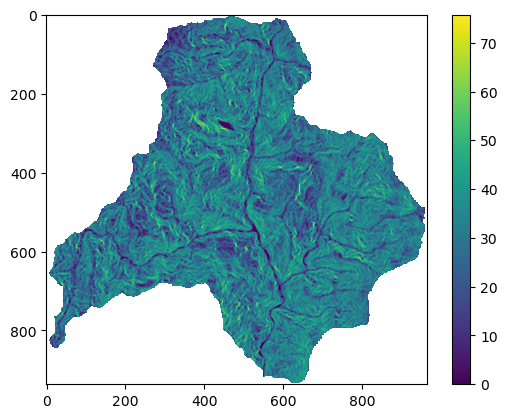

In [28]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();


In [29]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(484040,)

Mapa de curvatura

(484040,)

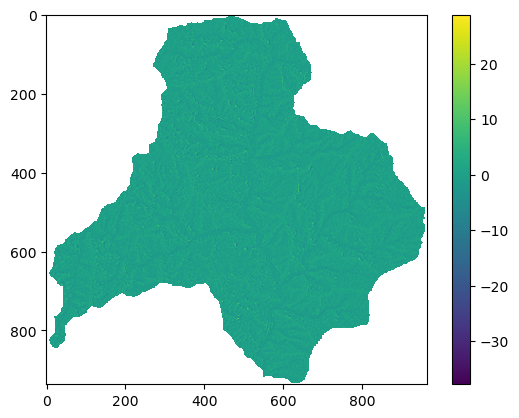

In [30]:

raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Curvatura/Curvatura_p12.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-37.76,np.nan,curvatura)

plt.imshow(curvatura)
plt.colorbar()
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
curvatura_vector_MenM.shape
curvatura_vector=curvatura.ravel()  # para pasarlo a un vector
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)] # para eliminar  del vector los datos NaN
curvatura_vector_MenM.shape # otra forma de saber las dimensiones


Mapa de flujo acumulado

(484040,)

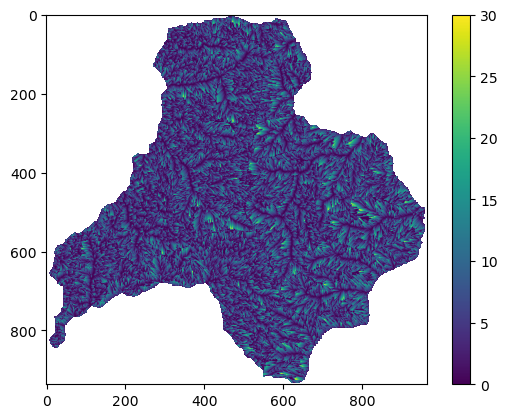

In [31]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Flujo%20acumulado/Flujoacum_11.tif?raw=true')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo=np.where(flujo>30,0,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape
flujo_vector=flujo.ravel()  # para pasarlo a un vector
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)] # para eliminar  del vector los datos NaN
flujo_vector_MenM.shape # otra forma de saber las dimensiones

Mapa de aspecto

(484040,)

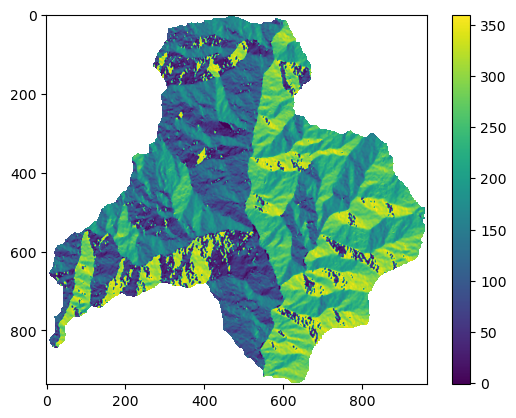

In [32]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Aspecto/Aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

Mapa de geología

(484040,)

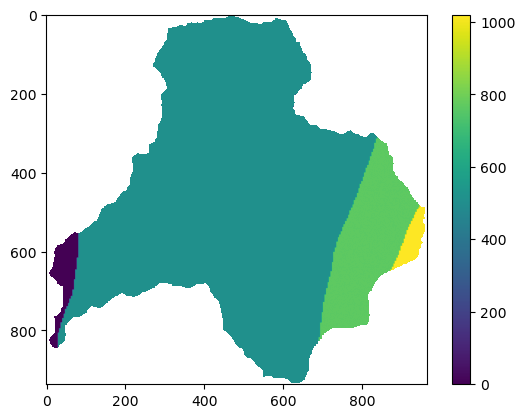

In [92]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,msk)
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Geolog%C3%ADa/Geolog%C3%ADaF.tif?raw=true')
geologia=raster.read(1)

geologia=np.where(geologia<0,np.nan,geologia)

geologia_vector=geologia.ravel()


geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]

geologia_vector_MenM.shape
geologia=msk*geologia
geologia=np.where(geologia==255,1,geologia)
plt.imshow(geologia)
plt.colorbar();
geologia_vector=geologia.ravel()  # para pasarlo a un vector
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)] # para eliminar  del vector los datos NaN
geologia_vector_MenM.shape # otra forma de saber las dimensiones

In [93]:
np.unique(geologia)

array([0.00e+00, 1.00e+00, 5.10e+02, 7.65e+02, 1.02e+03,      nan])

In [97]:
sumaa=2
geologia += sumaa

In [98]:
np.unique(geologia)

array([   4.,    5.,  514.,  769., 1024.,   nan])

Importamos inventario

(484040,)

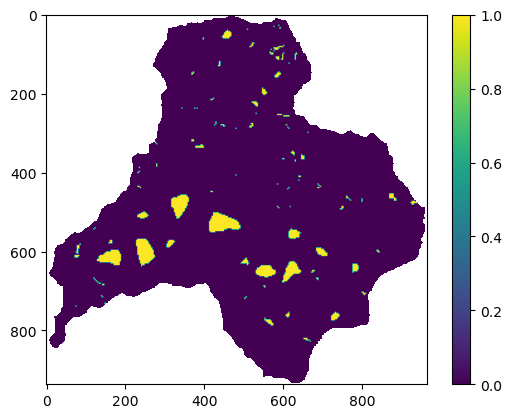

In [99]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Inventario/inventario.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

Crear Dataframe

In [100]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'Curvatura':curvatura_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'pendiente', 'Curvatura', 'flujo_acum', 'aspecto', 'geologia']


Graficas para categorizar las variables

In [101]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]

In [102]:
inventario_vector_MenM = inventario_vector_MenM.copy()
inventario_vector_MenM[inventario_vector_MenM == 0] =np.nan

Frequency ratio model (Likelihood)

total: 484040 6004 273798 204238
total1: 17429 148 7802 9479
0.6845888385691502 0.7913788819942106 1.2889460995553228
[0.68458885 0.79137886 1.2889462         nan]


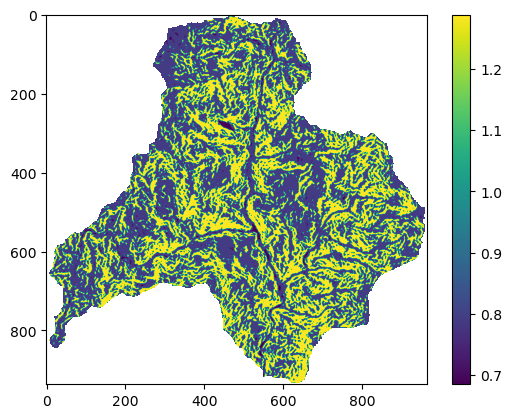

In [103]:

pendiente_serie=pd.Series(pendiente_vector_MenM)
ap=bp=cp=0
for row in pendiente_serie:
        if (0 <= row) & (row < 5):
          ap+=1
        elif (5<= row) & (row < 33):
          bp+=1
        if (row>=33):
          cp+=1

totalp=ap+bp+cp
print("total:", totalp,ap,bp,cp)

pendienteconMenM=pendiente_vector_MenM*inventario_vector_MenM
ap1=bp1=cp1=dp1=ep1=0
for row in pendienteconMenM:
        if (0 < row) & (row < 5):
          ap1+=1
        elif (5 <= row) & (row < 33):
          bp1+=1
        if (row>=33):
          cp1+=1

total1p=ap1+bp1+cp1
print("total1:", total1p,ap1,bp1,cp1)

w_a=(ap1/total1p)/(ap/totalp)
w_b=(bp1/total1p)/(bp/totalp)
w_c=(cp1/total1p)/(cp/totalp)

print(w_a,w_b,w_c)

pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<5 )),w_a,pendiente )
pendiente_c=np.where ( (np.logical_and (pendiente_c>=5, pendiente_c<33 )),w_b,pendiente_c )
pendiente_c=np.where ( pendiente_c>=33,w_c,pendiente_c )

plt.imshow(pendiente_c)
plt.colorbar()
print(np.unique(pendiente_c));

Aspecto

total: 482213 25044 244602 212567
total1: 17412 330 12425 4657
w: 0.3649223816806061 1.4067815035036886 0.606737238391574
[-1.          0.36492237  0.60673726  1.4067816          nan]


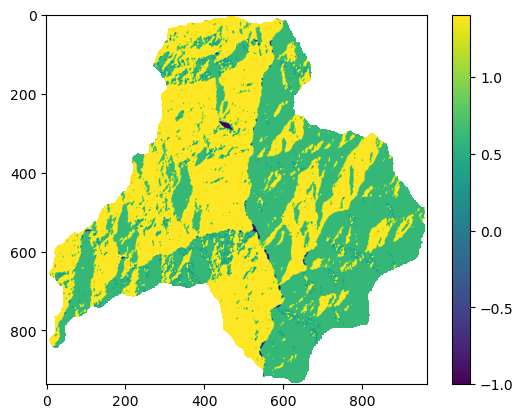

In [104]:
#Aspecto

aspecto_serie=pd.Series(aspecto_vector_MenM)
aa=ba=ca=0
for row in aspecto_serie:
        if (0 <= row) & (row < 25):
          aa+=1
        elif (25 <= row) & (row < 200):
          ba+=1
        if (row>=200):
          ca+=1

totala=aa+ba+ca
print("total:", totala,aa,ba,ca)

aspectoconMenM=aspecto_vector_MenM*inventario_vector_MenM
aa1=ba1=ca1=0
for row in aspectoconMenM:
        if (0 < row) & (row < 25):
          aa1+=1
        elif (25 <= row) & (row < 200):
          ba1+=1
        if (row>=200):
          ca1+=1

total1a=aa1+ba1+ca1
print("total1:", total1a,aa1,ba1,ca1)

w_a=(aa1/total1a)/(aa/totala)
w_b=(ba1/total1a)/(ba/totala)
w_c=(ca1/total1a)/(ca/totala)

print("w:", w_a,w_b,w_c)

aspecto_c=np.where ( (np.logical_and (aspecto>=0, aspecto<25 )),w_a,aspecto )
aspecto_c=np.where ( (np.logical_and (aspecto_c>=25, aspecto_c<200 )),w_b,aspecto_c )
aspecto_c=np.where ( aspecto_c>=200,w_c,aspecto_c )

plt.imshow(aspecto_c)
plt.colorbar()
print(np.unique(aspecto_c));

Curvatura

total: 484035 17 469 6140 42953 155607 230877 41340 6084 452 49 24 23
total1: 17475 1 27 261 1650 5619 8050 1581 271 14 0 0 1
1.629336026255996 1.594595386037318 1.177420838517566 1.0640205698433332 1.0002060655115224 0.9657724034578284 1.0593048954446638 1.233785514950916 0.8579247217896615 0.0 0.0 1.204291845493562
[-37.76      -32.        -31.36      -30.72      -30.08        0.
   0.8579247   0.9657724   1.059305    1.2042918   1.2337855         nan]


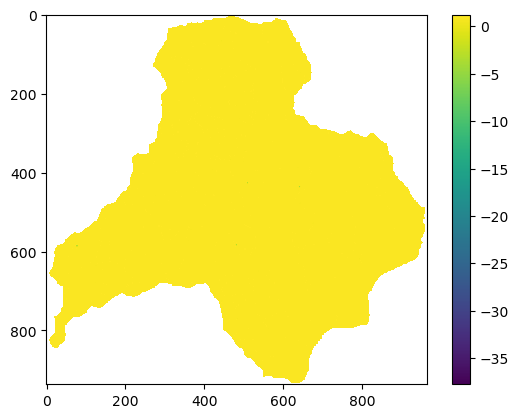

In [105]:
#Curvatura

curvatura_serie=pd.Series(curvatura_vector_MenM)
ac=bc=cc=dc=ec=fc=gc=hc=ic=jc=kc=lc=0
for row in curvatura_serie:
        if (-30 <= row) & (row < -20):
          ac+=1
        elif (-20 <= row) & (row < -10):
          bc+=1
        elif (-10 <= row) & (row < -5):
          cc+=1
        elif (-5 <= row) & (row < -2.5):
          dc+=1
        elif (-2.5 <= row) & (row < 0):
          ec+=1  
        elif (0 <= row) & (row < 2.5):
          fc+=1
        elif (2.5 <= row) & (row < 5):
          gc+=1
        elif (5 <= row) & (row < 10):
          hc+=1
        elif (10 <= row) & (row < 15):
          ic+=1
        elif (15 <= row) & (row < 17.5):
          jc+=1
        elif (17.5 <= row) & (row < 20):
          kc+=1  
        if (row>=20):
          lc+=1

totalc=ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc
print("total:", totalc,ac,bc,cc,dc,ec,fc,gc,hc,ic,jc,kc,lc)

curvaturaconMenM=curvatura_vector_MenM*inventario_vector_MenM
ac1=bc1=cc1=dc1=ec1=fc1=gc1=hc1=ic1=jc1=kc1=lc1=0
for row in curvaturaconMenM:
        if (-30 <= row) & (row < -20):
          ac1+=1
        elif (-20 <= row) & (row < -10):
          bc1+=1
        elif (-10 <= row) & (row < -5):
          cc1+=1
        elif (-5 <= row) & (row < -2.5):
          dc1+=1
        elif (-2.5 <= row) & (row < 0):
          ec1+=1  
        elif (0 <= row) & (row < 2.5):
          fc1+=1
        elif (2.5 <= row) & (row < 5):
          gc1+=1
        elif (5 <= row) & (row < 10):
          hc1+=1
        elif (10 <= row) & (row < 15):
          ic1+=1
        elif (15 <= row) & (row < 17.5):
          jc+=1
        elif (17.5 <= row) & (row < 20):
          kc1+=1  
        if (row>=20):
          lc1+=1

total1c=ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1
print("total1:", total1c,ac1,bc1,cc1,dc1,ec1,fc1,gc1,hc1,ic1,jc1,kc1,lc1)

w_a=(ac1/total1c)/(ac/totalc)
w_b=(bc1/total1c)/(bc/totalc)
w_c=(cc1/total1c)/(cc/totalc)
w_d=(dc1/total1c)/(dc/totalc)
w_e=(ec1/total1c)/(ec/totalc)
w_f=(fc1/total1c)/(fc/totalc)
w_g=(gc1/total1c)/(gc/totalc)
w_h=(hc1/total1c)/(hc/totalc)
w_i=(ic1/total1c)/(ic/totalc)
w_j=(jc1/total1c)/(jc/totalc)
w_k=(kc1/total1c)/(kc/totalc)
w_l=(lc1/total1c)/(lc/totalc)
print(w_a,w_b,w_c,w_d,w_e,w_f,w_g,w_h,w_i,w_j,w_k,w_l)

curvatura_c=np.where ( (np.logical_and (curvatura>=-30, curvatura<-20 )),w_a,curvatura )
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-20, curvatura_c<-10 )),w_b,curvatura_c )
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-10, curvatura_c<-5 )),w_c,curvatura_c )
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-5, curvatura_c<-2.5 )),w_d,curvatura_c )
curvatura_c=np.where ( (np.logical_and (curvatura_c>=-2.5, curvatura_c<0 )),w_e,curvatura_c )
curvatura_c=np.where ( (np.logical_and (curvatura_c>=0, curvatura_c<2.5 )),w_f,curvatura_c )
curvatura_c=np.where ( (np.logical_and (curvatura_c>=2.5, curvatura_c<5 )),w_g,curvatura_c )
curvatura_c=np.where ( (np.logical_and (curvatura_c>=5, curvatura_c<10)),w_h,curvatura_c )
curvatura_c=np.where ( (np.logical_and (curvatura_c>=10, curvatura_c<15 )),w_i,curvatura_c )
curvatura_c=np.where ( (np.logical_and (curvatura_c>=15, curvatura_c<17.5)),w_j,curvatura_c )
curvatura_c=np.where ( (np.logical_and (curvatura_c>=17.5, curvatura_c<20)),w_k,curvatura_c )
curvatura_c=np.where ( curvatura_c>=20,w_l,curvatura_c )

plt.imshow(curvatura_c)
plt.colorbar()
print(np.unique(curvatura_c));

Flujo_acum

total: 484040 127800 53509 251349 39935 11447
total1: 17479 4448 1831 9104 1627 469
0.9638259047454306 0.9476024598911827 1.0030434753417206 1.1282323133751306 1.1346079696789286
[0.94760245 0.9638259  1.0030435  1.1282324  1.1346079         nan]


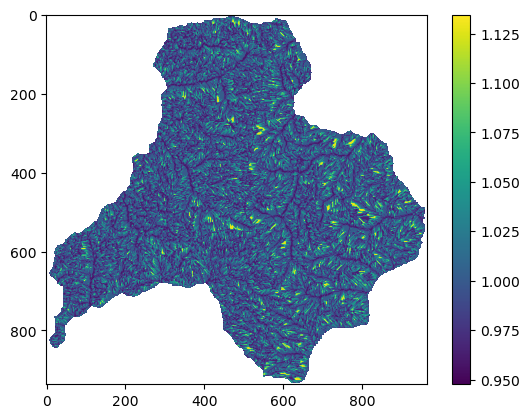

In [106]:
flujo_serie=pd.Series(flujo_vector_MenM)
af=bf=cf=df=ef=0
for row in flujo_serie:
        if (0 <= row) & (row < 1):
          af+=1
        elif (1 <= row) & (row < 2):
          bf+=1
        elif (2 <= row) & (row < 15):
          cf+=1
        elif (15 <= row) & (row < 25):
          df+=1
        if (row>=25):
          ef+=1

totalf=af+bf+cf+df+ef
print("total:", totalf,af,bf,cf,df,ef)

flujoconMenM=flujo_vector_MenM*inventario_vector_MenM
af1=bf1=cf1=df1=ef1=0
for row in flujoconMenM:
        if (0 <= row) & (row < 1):
          af1+=1
        elif (1 <= row) & (row < 2):
          bf1+=1
        elif (2 <= row) & (row < 15):
          cf1+=1
        elif (15 <= row) & (row < 25):
          df1+=1
        if (row>=25):
          ef1+=1

totalf1=af1+bf1+cf1+df1+ef1
print("total1:", totalf1,af1,bf1,cf1,df1,ef1)

w_a=(af1/totalf1)/(af/totalf)
w_b=(bf1/totalf1)/(bf/totalf)
w_c=(cf1/totalf1)/(cf/totalf)
w_d=(df1/totalf1)/(df/totalf)
w_e=(ef1/totalf1)/(ef/totalf)
print(w_a,w_b,w_c,w_d,w_e)

flujo_acum_c=np.where ( (np.logical_and (flujo>=0, flujo <1 )),w_a,flujo )
flujo_acum_c=np.where ( (np.logical_and (flujo_acum_c>=1, flujo_acum_c<2 )),w_b,flujo_acum_c )
flujo_acum_c=np.where ( (np.logical_and (flujo_acum_c>=2, flujo_acum_c<15 )),w_c,flujo_acum_c)
flujo_acum_c=np.where ( (np.logical_and (flujo_acum_c>=15, flujo_acum_c<25)),w_d,flujo_acum_c )
flujo_acum_c=np.where ( flujo_acum_c>=25,w_e,flujo_acum_c )

plt.imshow(flujo_acum_c)
plt.colorbar()
print(np.unique(flujo_acum_c));

Geologia

total 477459 469 10521 405980 60489 6581
total1 17479 0 167 16241 1071 0
w: 0.0 0.4335896953895695 1.0927671444351592 0.4836515319648271
[0.         0.4335897  0.48365153 1.09276714        nan]


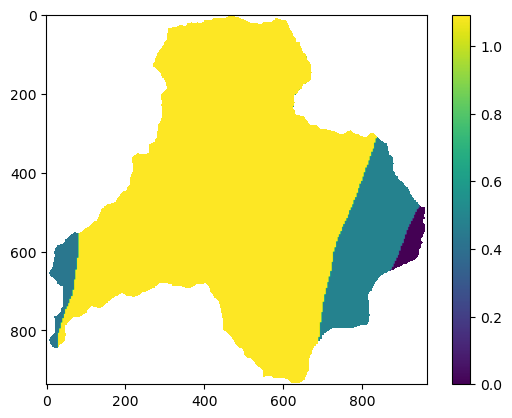

In [109]:
ag=(geologia == 4).sum()
bg=(geologia == 5).sum()
cg=(geologia == 514).sum()
dg=(geologia == 769).sum()
fg=(geologia == 1024).sum()

totalg=ag+bg+cg+dg
print("total", totalg,ag,bg,cg,dg,fg)

geologiaconMenM=geologia*inventario
ag1=(geologiaconMenM == 4).sum()
bg1=(geologiaconMenM == 5).sum()
cg1=(geologiaconMenM == 514).sum()
dg1=(geologiaconMenM == 769).sum()
fg1=(geologiaconMenM == 1024).sum()


total1g=ag1+bg1+cg1+dg1+fg1
print("total1", total1g,ag1,bg1,cg1,dg1,fg1)

w_a=(ag1/total1g)/(ag/totalg)
w_b=(bg1/total1g)/(bg/totalg)
w_c=(cg1/total1g)/(cg/totalg)
w_d=(dg1/total1g)/(dg/totalg)
w_f=(fg1/total1g)/(fg/totalg)

print("w:", w_a,w_b,w_c,w_d)

geologia_c=np.where ( geologia==4,w_a,geologia )
geologia_c=np.where ( geologia_c==5,w_b,geologia_c )
geologia_c=np.where ( geologia_c==514,w_c,geologia_c )
geologia_c=np.where ( geologia_c==769,w_d,geologia_c )
geologia_c=np.where ( geologia_c==1024,w_f,geologia_c )
plt.imshow(geologia_c)
plt.colorbar()
print(np.unique(geologia_c));

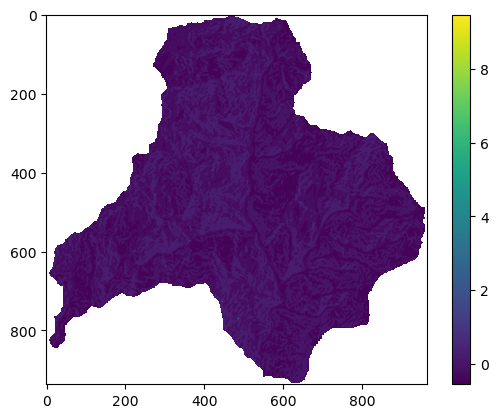

In [130]:
IS=0.1412*aspecto_c+0.316*curvatura_c+0.0986*flujo_acum_c+0.4442*pendiente_c
plt.imshow(IS);
plt.colorbar();

Peso de la evidencia (WoE)

-0.390649333310729 0.004101632275158661 -0.24174071142388018 0.2505444509568781 0.26467637726043247 -0.2447254233306679
[-0.49228516 -0.39475095  0.5094018          nan]


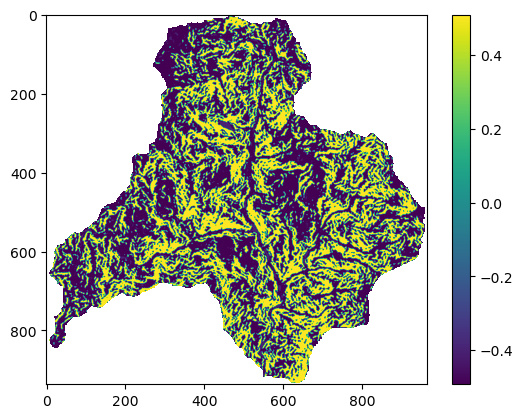

In [111]:
#Pendiente

#Clase a
x1=ap1
x2=total1p-ap1
x3=ap-ap1
x4=(bp+cp)-(bp1+cp1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente>=0, pendiente<5 )),c,pendiente );

#Clase b
x1=bp1
x2=total1p-bp1
x3=bp-bp1
x4=(ap+cp)-(ap1+cp1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where ( (np.logical_and (pendiente_c>=5, pendiente_c<33 )),cont,pendiente_c )

#Clase c
x1=cp1
x2=total1p-cp1
x3=cp-cp1
x4=(ap+bp)-(ap1+bp1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

pendiente_c=np.where (pendiente_c>=33,cont,pendiente_c )

print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c)

plt.imshow(pendiente_c)
plt.colorbar()
print(np.unique(pendiente_c));

-1.031582775895279 0.03550257619271297 0.35666029347417194 -0.5581391563167537 -0.5142840964467262 0.2817212144867448
[-1.0670854  -1.         -0.7960053   0.91479945         nan]


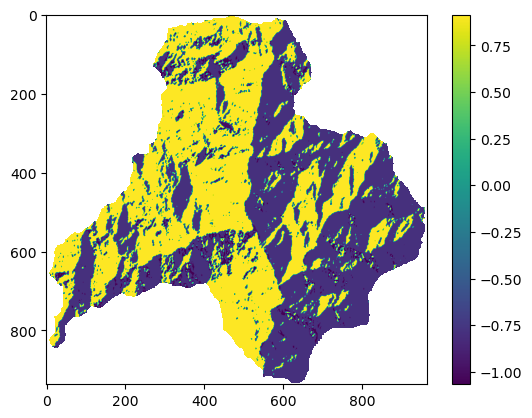

In [112]:
    #Aspecto

#Clase a
x1=aa1
x2=total1a-aa1
x3=aa-aa1
x4=(ba+ca)-(ba1+ca1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto>=0, aspecto<25 )),cont,aspecto )

#Clase b
x1=ba1
x2=total1a-ba1
x3=ba-ba1
x4=(aa+ca)-(aa1+ca1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where ((np.logical_and (aspecto_c>=25, aspecto_c<200 )),cont,aspecto_c )

#Clase c
x1=ca1
x2=total1a-ca1
x3=ca-ca1
x4=(aa+ba)-(aa1+ba1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

aspecto_c=np.where (aspecto_c>=200,cont,aspecto_c )

print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c)

plt.imshow(aspecto_c)
plt.colorbar()
print(np.unique(aspecto_c));

-0.03316554909788547 1.9298208366486514e-06 -0.03316747891872209
-0.5813004210576721 1.1188643045388555 -1.7001647255965275
2.739423173141896 -5.352909244147436e-05 2.739476702234337
-0.3263100736797539 0.006096434379219648 -0.3324065080589736
2.739423173141896 -5.352909244147436e-05 2.739476702234337
-1.1924596825517453 0.00013134918874921876 -1.1925910317404946
2.739423173141896 -5.352909244147436e-05 2.739476702234337
-0.3516192802164201 2.4114247370433568e-05 -0.35164339446379045
-0.03316554909788547 1.9298208366486514e-06 -0.05604984293147327 8.921539452903572e-05 2.739423173141896 -5.352909244147436e-05 -0.48073667549968274 0.06652387385612474 2.739423173141896 -5.352909244147436e-05 -0.5813004210576721 1.1188643045388555 2.739423173141896 -5.352909244147436e-05 -0.3263100736797539 0.006096434379219648 2.739423173141896 -5.352909244147436e-05 -1.1924596825517453 0.00013134918874921876 2.739423173141896 -5.352909244147436e-05 -0.3516192802164201 2.4114247370433568e-05
[-0.35164338

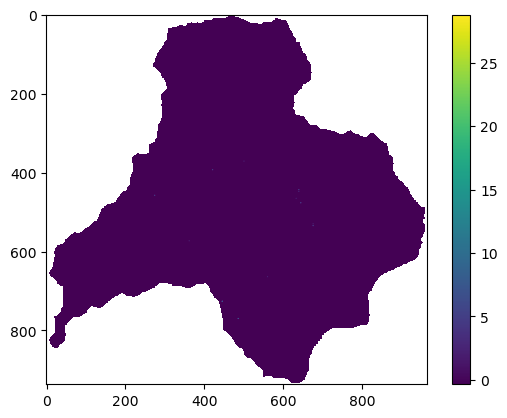

In [115]:
#Curvatura



#Clase a
x1=ac1
x2=total1c-ac1
x3=ac-ac1
x4=(bc+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc)-(bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_a, wn_a, c)

curvatura_c=np.where (curvatura<-20,c,curvatura );

#Clase b
x1=bc1
x2=total1c-bc1
x3=bc-bc1
x4=(ac+cc+dc+ec+fc+gc+hc+ic+jc+kc+lc)-(ac1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_and (curvatura_c>=-20, curvatura_c<-10)),cont,curvatura_c )

#Clase c
x1=cc1
x2=total1c-cc1
x3=cc-cc1
x4=(ac+bc+dc+ec+fc+gc+hc+ic+jc+kc+lc)-(ac1+bc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1)

wp_c=np.log((x1/(x1+x2)/(x3/(x3+x4))))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_and (curvatura_c>=-10, curvatura_c<-5 )),cont,curvatura_c )

#Clase d
x1=dc1
x2=total1c-dc1
x3=dc-dc1
x4=(ac+bc+cc+ec+fc+gc+hc+ic+jc+kc+lc)-(ac1+bc1+cc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1+lc1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_and (curvatura_c>=-5, curvatura_c<-2.5 )),cont,curvatura_c )

#Clase e
x1=ec1
x2=total1c-ec1
x3=ec-ec1
x4=(ac+bc+cc+dc+fc+gc+hc+ic+jc+kc+lc)-(ac1+bc1+cc1+dc1+fc1+gc1+hc1+ic1+jc1+kc1+lc1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

curvatura_c=np.where ( (np.logical_and (curvatura_c>=-2.5, curvatura_c<0 )),cont,curvatura_c )

#Clase f
x1=fc1
x2=total1c-fc1
x3=fc-fc1
x4=(ac+bc+cc+dc+ec+gc+hc+ic+jc+kc+lc)-(ac1+bc1+cc1+dc1+ec1+gc1+hc1+ic1+jc1+kc1+lc1)

wp_f=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_f=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_f, wn_f, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=0, curvatura<2.5 )),c,curvatura );

#Clase g
x1=gc1
x2=total1c-gc1
x3=gc-gc1
x4=(ac+bc+cc+dc+ec+fc+hc+ic+jc+kc+lc)-(ac1+bc1+cc1+dc1+ec1+fc1+hc1+ic1+jc1+kc1+lc1)

wp_g=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_g=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_g, wn_g, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=2.5, curvatura<5 )),c,curvatura );

#Clase h
x1=hc1
x2=total1c-hc1
x3=hc-hc1
x4=(ac+bc+cc+dc+ec+fc+gc+ic+jc+kc+lc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+ic1+jc1+kc1+lc1)

wp_h=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_h=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_h, wn_h, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=5, curvatura<10)),c,curvatura );

#Clase i
x1=ic1
x2=total1c-ic1
x3=ic-ic1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+jc+kc+lc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+jc1+kc1+lc1)

wp_i=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_i=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_i, wn_i, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=10, curvatura<15)),c,curvatura );

#Clase j
x1=jc1+1
x2=total1c-jc1
x3=jc-jc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+kc+lc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+kc1+lc1)

wp_j=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_j=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_j, wn_j, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=15, curvatura<17.5)),c,curvatura );

#Clase k
x1=kc1
x2=total1c-kc1
x3=kc-kc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+lc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+lc1)

wp_k=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_k=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_k, wn_k, c)

curvatura_c=np.where ( (np.logical_and (curvatura>=17.5, curvatura<20 )),c,curvatura );

#Clase l
x1=lc1
x2=total1c-lc1
x3=lc-lc1
x4=(ac+bc+cc+dc+ec+fc+gc+hc+ic+jc+kc)-(ac1+bc1+cc1+dc1+ec1+fc1+gc1+hc1+ic1+jc1+kc1)

wp_l=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_l=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_l, wn_l, c)

curvatura_c=np.where (curvatura<20,c,curvatura );


print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e, wp_f, wn_f, wp_g, wn_g, wp_h, wn_h, wp_i, wn_i, wp_j, wn_j, wp_k, wn_k, wp_l, wn_l)

plt.imshow(curvatura_c)
plt.colorbar()
print(np.unique(curvatura_c));


-2.843531675749278 0.0009259002072048502 -0.814093125361586 0.012274508818505203 -9.606988083589757 1.9010066368457512 0.13545756493996025 -7.703145716609184
[   4.    5.  514.  769. 1024.   nan]


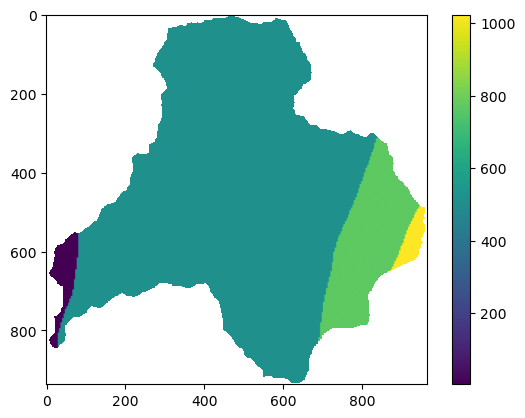

In [114]:
#Geología

cg1=dg1=0   #clases que obtuvieron 0 celdas con movimientos en masa

#Clase a
x1=ag1+1
x2=total1g-ag1
x3=ag-ag1
x4=(bg+cg+dg)-(bg1+cg1+dg1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where(geologia==1,cont,geologia)

#Clase b
x1=bg1+1
x2=total1g-bg1
x3=bg-bg1
x4=(ag+cg+dg)-(ag1+cg1+dg1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==1,cont,geologia_c)

#Clase c
x1=cg1+1
x2=total1g-cg1
x3=cg-cg1
x4=(ag+bg+dg)-(ag1+bg1+dg1)

wp_c=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==510,cont,geologia_c)

#Clase d
x1=dg1+1
x2=total1g-dg1
x3=dg-dg1
x4=(ag+bg+cg)-(ag1+bg1+cg1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

geologia_c=np.where (geologia_c==765,cont,geologia_c)

print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c,wn_d,wp_d)

plt.imshow(geologia_c)
plt.colorbar()
print(np.unique(geologia_c));

-1.1481116809713965 1.3273040370358338 -2.47541571800723
-1.1481116809713965 1.3273040370358338 -0.6070075963677907 0.1028639191157788 0.0032055049541842677 -0.0034732918094618325 0.12602491841857877 -0.012087064607841407 0.13341554809187275 -0.0034451085386544137
[-0.70987153  0.0066788   0.13686065  0.13811198         nan]


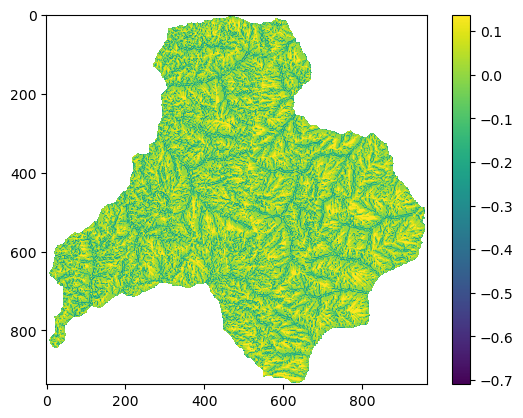

In [128]:
#flujo



#Clase a
x1=af1+1
x2=totalf1-af1
x3=af-af1
x4=(bc+cc+dc+ec)-(bf1+cf1+df1+ef1)

wp_a=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_a=np.log((x2/(x1+x2))/(x4/(x3+x4)))
c=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))
print(wp_a, wn_a, c)

flujo_acum_c=np.where ((np.logical_and (flujo>=0, flujo<1)),cont,flujo)

#Clase b
x1=bf1+1
x2=totalf1-bf1
x3=bf-bf1
x4=(af+bf+df+ef)-(af1+cf1+df1+ef1)

wp_b=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_b=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

flujo_acum_c=np.where ( (np.logical_and (flujo_acum_c>=1, flujo_acum_c<2)),cont,flujo_acum_c)

#Clase c
x1=cf1+1
x2=totalf1-cf1
x3=cf-cf1
x4=(af+bf+df+ef)-(af1+bf1+df1+ef1)

wp_c=np.log((x1/(x1+x2)/(x3/(x3+x4))))
wn_c=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

flujo_acum_c=np.where ( (np.logical_and (flujo_acum_c>=2, flujo_acum_c<15 )),cont,flujo_acum_c)

#Clase d
x1=df1+1
x2=totalf1-df1
x3=df-df1
x4=(af+bf+cf+ef)-(af1+bf1+cf1+ef1)

wp_d=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_d=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

flujo_acum_c=np.where ( (np.logical_and (flujo_acum_c>=15, flujo_acum_c<25 )),cont,flujo_acum_c )

#Clase e
x1=ef1+1
x2=totalf1-ef1
x3=ef-ef1
x4=(af+bf+cf+df)-(af1+bf1+cf1+df1)

wp_e=np.log((x1/(x1+x2))/(x3/(x3+x4)))
wn_e=np.log((x2/(x1+x2))/(x4/(x3+x4)))
cont=np.log(((x1/(x1+x2))/(x3/(x3+x4)))/((x2/(x1+x2))/(x4/(x3+x4))))

flujo_acum_c=np.where (flujo_acum_c>=25,cont,flujo_acum_c );


print(wp_a, wn_a, wp_b, wn_b, wp_c, wn_c, wp_d, wn_d, wp_e, wn_e)

plt.imshow(flujo_acum_c)
plt.colorbar()
print(np.unique(flujo_acum_c));


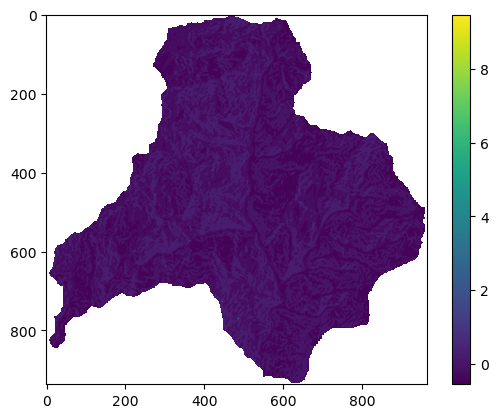

In [131]:
IS=0.1412*aspecto_c+0.316*curvatura_c+0.0986*flujo_acum_c+0.4442*pendiente_c
plt.imshow(IS);
plt.colorbar();